## Лабораторная работа №1
** Выполнила: Елизарова Юлия**

В работе будет рассмотрена задача классификации на примере возможности выяления и предсказания фактов фальсификации финансовой отчетности (на основании ключевых показателей отчетности компаний, торгующихся на американской фондовой бирже). В качестве зависимой переменной будет выступать аудиторское заключение по компании об отсутствии или наличии выявленного факта мошенничества.

## 0. Некоторые предварительные манипуляции с данными

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считываем данные из csv файла

In [2]:
data = pd.read_csv(r'C:\\Users\\Julia\\Desktop\\Data_audit.csv', sep = ";")

In [4]:
type(data)

pandas.core.frame.DataFrame

Данные представляют из себя следующий dataframe

In [4]:
data

,auop,conml,loc,DataDate,intas,gptas,nptas,catas,cacl,ctas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
0,1.0,United Dominion Industries,USA,31.12.1985,0.208598,0.231062,0.093784,0.516196,1.870133,0.000000,...,1518.949,0.012101,0.052249,0.010771,0.043377,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,United Dominion Industries,USA,31.12.1986,0.106471,0.160601,0.037876,0.554837,1.792869,0.000000,...,1058.181,-0.064077,-0.299401,-0.066991,-0.255691,1.224844,0.949852,0.695962,0.561962,0.993621
2,1.0,United Dominion Industries,USA,31.12.1987,0.152379,0.233465,-0.188289,0.604568,1.515244,0.000000,...,1066.226,-0.223124,-4.541684,-0.170894,-0.729782,0.938997,0.460996,1.013543,0.096664,1.171912
3,4.0,United Dominion Industries,USA,31.12.1988,0.190014,0.226582,-0.150170,0.733104,2.311700,0.000000,...,1435.345,0.021422,0.084468,0.017458,0.082027,0.968385,0.063906,1.324630,14.876097,0.809513
4,4.0,United Dominion Industries,USA,31.12.1989,0.247775,0.242496,-0.149098,0.645265,2.194085,0.140408,...,1386.869,0.071851,0.223698,0.052220,0.301400,1.047725,20.298031,0.962742,1.014850,0.878229
5,1.0,United Dominion Industries,USA,31.12.1991,0.195021,0.259088,-0.051789,0.588704,1.851237,0.106475,...,1329.470,0.042368,0.109326,0.027408,0.147534,1.051525,1.066852,0.963059,1.068999,1.117249
6,1.0,United Dominion Industries,USA,31.12.1992,0.193362,0.285885,-0.044316,0.546032,1.703733,0.071404,...,1681.089,0.025269,0.064473,0.015014,0.080136,0.986705,1.116947,1.266834,1.435276,1.033437
7,1.0,United Dominion Industries,USA,31.12.1993,0.175211,0.266759,-0.023744,0.455252,1.780224,0.048266,...,1798.729,0.030353,0.096421,0.021793,0.104660,0.886900,1.837365,1.067892,1.143719,1.092981
8,1.0,United Dominion Industries,USA,31.12.1994,0.186651,0.359189,0.015408,0.485867,1.665073,0.074917,...,1991.090,0.045715,0.117875,0.030516,0.156214,0.798800,0.869511,1.114754,1.488870,0.886875
9,1.0,United Dominion Industries,USA,31.12.1995,0.200256,0.344957,0.081596,0.443047,1.668261,0.072153,...,1758.072,0.052862,0.127083,0.043502,0.169574,0.844602,1.107150,0.886332,1.369490,1.015353


In [5]:
print(data)

       auop                        conml  loc    DataDate     intas     gptas  \
0       1.0   United Dominion Industries  USA  31.12.1985  0.208598  0.231062   
1       1.0   United Dominion Industries  USA  31.12.1986  0.106471  0.160601   
2       1.0   United Dominion Industries  USA  31.12.1987  0.152379  0.233465   
3       4.0   United Dominion Industries  USA  31.12.1988  0.190014  0.226582   
4       4.0   United Dominion Industries  USA  31.12.1989  0.247775  0.242496   
5       1.0   United Dominion Industries  USA  31.12.1991  0.195021  0.259088   
6       1.0   United Dominion Industries  USA  31.12.1992  0.193362  0.285885   
7       1.0   United Dominion Industries  USA  31.12.1993  0.175211  0.266759   
8       1.0   United Dominion Industries  USA  31.12.1994  0.186651  0.359189   
9       1.0   United Dominion Industries  USA  31.12.1995  0.200256  0.344957   
10      1.0   United Dominion Industries  USA  31.12.1996  0.168186  0.338709   
11      1.0   United Dominio

In [6]:
data.head() #первые 5 строк

,auop,conml,loc,DataDate,intas,gptas,nptas,catas,cacl,ctas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
0,1.0,United Dominion Industries,USA,31.12.1985,0.208598,0.231062,0.093784,0.516196,1.870133,0.000000,...,1518.949,0.012101,0.052249,0.010771,0.043377,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,United Dominion Industries,USA,31.12.1986,0.106471,0.160601,0.037876,0.554837,1.792869,0.000000,...,1058.181,-0.064077,-0.299401,-0.066991,-0.255691,1.224844,0.949852,0.695962,0.561962,0.993621
2,1.0,United Dominion Industries,USA,31.12.1987,0.152379,0.233465,-0.188289,0.604568,1.515244,0.000000,...,1066.226,-0.223124,-4.541684,-0.170894,-0.729782,0.938997,0.460996,1.013543,0.096664,1.171912
3,4.0,United Dominion Industries,USA,31.12.1988,0.190014,0.226582,-0.150170,0.733104,2.311700,0.000000,...,1435.345,0.021422,0.084468,0.017458,0.082027,0.968385,0.063906,1.324630,14.876097,0.809513
4,4.0,United Dominion Industries,USA,31.12.1989,0.247775,0.242496,-0.149098,0.645265,2.194085,0.140408,...,1386.869,0.071851,0.223698,0.052220,0.301400,1.047725,20.298031,0.962742,1.014850,0.878229


In [7]:
data.tail() #последние 5 строк

,auop,conml,loc,DataDate,intas,gptas,nptas,catas,cacl,ctas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
21560,1.0,Dorian LPG Ltd,USA,31.03.2015,0.003072,0.055310,0.025562,0.212183,8.270773,0.186353,...,90.035,0.022983,0.028929,0.242593,0.030149,1.000000,1.000000,1.000000,1.000000,1.000000
21561,1.0,Nomad Foods Ltd,GBR,31.12.2015,0.064832,0.058827,0.025478,0.232164,1.099740,0.125505,...,942.779,-0.068422,-0.178645,-0.377208,-0.982236,0.000000,0.000000,0.000000,0.000000,0.000000
21562,1.0,Nomad Foods Ltd,GBR,31.12.2015,0.064832,0.058827,0.025478,0.232164,1.099740,0.125505,...,942.779,-0.068422,-0.178645,-0.377208,-0.982236,1.000000,1.000000,1.000000,1.000000,1.000000
21563,3.0,Nomad Foods Ltd,GBR,31.12.2016,0.069009,0.132095,0.021403,0.185540,1.160271,0.069965,...,1964.782,0.007729,0.019133,0.018882,0.105936,1.004951,1.062054,2.094832,0.957682,0.911439
21564,1.0,Nomad Foods Ltd,GBR,31.12.2016,0.069009,0.132095,0.021403,0.185540,1.160271,0.069965,...,1964.782,0.007729,0.019133,0.018882,0.105936,1.000000,1.000000,1.000000,1.000000,1.000000


**Зависимая переменная:**

- auop - Auditor's opinion

**Объясняющие переменные:**

- intas - Inventory/Total assets

- gptas - Gross profit/Total assets

- nptas - Net profit/Total assets

- catas - Current assets/Total assets

- cacl - Current assets/Current liabilities 

- ctas - Cash/Total assets 

- incl - Inventory/Current liabilities

- ltdtas - Long term debt/Total assets

- npgp - Net profit/Gross profit

- tdtas - Total debt/Total assets 

- fastas - Fixed assets/Total assets

- tatasly - Total assets/Total assets of last year

- ieoe - Interest Expense/Operating Expenses

- gpns - Gross profit ratio

- npic - Return of invested capital

- caicl - Quick ratio

- wctas - Working Capital to Total Assets Ratio

- catas - Current assets to total assets ratio

- nstas - Assets turnover ratio

- inic - Inventory to invested capital ratio

- slic - Invested capital turnover ratio

- incas - Inventory to current assets ratio

- ebit - EBIT

- nitas - Return of assets

- ninas - Return of equity

- nisl - Return of sale

- nifas - Net income/Fixed assets

- trcgs - Индекс рентабельности продаж по валовой прибыль

- tafas - Индекс качества активов

- ttrev - Индекс роста выручки

- defas - Индекс амортизации

- ldsdta - Индекс коэффициента финансовой зависимости

- loc - Country

- datadate - Year

In [8]:
print(data.shape)
print(data.columns)

(21565, 34)
Index(['auop', 'conml', 'loc', 'DataDate', 'intas', 'gptas', 'nptas', 'catas',
       'cacl', 'ctas', 'incl', 'ltdtas', 'npgp', 'tdtas', 'fastas', 'tatasly',
       'gpns', 'npic', 'caicl', 'wctas', 'nstas', 'inic', 'slic', 'incas',
       'ebit', 'nitas', 'ninas', 'nisl', 'nifas', 'trcgs', 'tafas', 'ttrev',
       'defas', 'ldsdta'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=21565, step=1)

In [10]:
data.at[10, 'loc']

'USA'

In [11]:
data['loc']

0        USA
1        USA
2        USA
3        USA
4        USA
5        USA
6        USA
7        USA
8        USA
9        USA
10       USA
11       USA
12       USA
13       USA
14       USA
15       CAN
16       CAN
17       CAN
18       CAN
19       CAN
20       CAN
21       CAN
22       CAN
23       CAN
24       CAN
25       CAN
26       CAN
27       CAN
28       CAN
29       CAN
        ... 
21535    BMU
21536    BMU
21537    BMU
21538    BMU
21539    USA
21540    USA
21541    USA
21542    USA
21543    USA
21544    USA
21545    USA
21546    USA
21547    BMU
21548    BMU
21549    FRA
21550    FRA
21551    HKG
21552    HKG
21553    HKG
21554    MCO
21555    IRL
21556    IRL
21557    IRL
21558    IRL
21559    USA
21560    USA
21561    GBR
21562    GBR
21563    GBR
21564    GBR
Name: loc, Length: 21565, dtype: object

In [12]:
data['loc'][15]
#print(data.columns)

'CAN'

In [13]:
data['intas'].dtype.name

'float64'

In [14]:
type(data['loc'][3])

str

In [15]:
type(data['loc'])

pandas.core.series.Series

In [16]:
data[['loc', 'auop']].head()

,loc,auop
0,USA,1.0
1,USA,1.0
2,USA,1.0
3,USA,4.0
4,USA,4.0


Вывод описательной статистики

In [17]:
data.describe()

,auop,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
count,21427.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,...,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000
mean,1.634013,0.071835,0.227424,0.117119,0.327162,1.872637,0.089691,0.535517,0.181748,0.361364,...,12678.293797,0.031432,0.084757,-0.725551,0.249149,0.894133,1.286055,1.349424,1.719008,1.040599
std,1.225867,0.090411,0.202277,0.523943,0.243448,5.287592,0.116556,9.069063,0.166983,137.608727,...,29501.094451,0.207415,1.803849,57.839597,21.687419,15.278540,38.573951,44.318867,44.888240,5.821885
min,0.000000,0.000000,-3.820055,-29.180662,0.000000,0.000000,-0.016112,0.000000,0.000000,-18239.000000,...,-15260.776000,-18.568807,-61.654838,-5637.437500,-1377.466165,-841.653543,-1652.157471,-38.088235,-292.302859,0.000000
25%,1.000000,0.002698,0.093780,0.024552,0.128005,0.749072,0.017261,0.000000,0.053237,0.234461,...,648.246000,0.007533,0.037950,0.021269,0.000000,0.954107,0.908859,0.995198,1.000000,0.938182
50%,1.000000,0.037125,0.193756,0.142784,0.302972,1.281365,0.050370,0.165037,0.152489,0.794843,...,2733.345000,0.037918,0.110805,0.072425,0.054540,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.116546,0.324393,0.301233,0.506176,2.003565,0.114484,0.439484,0.269208,1.529336,...,11588.000000,0.077344,0.185718,0.148513,0.166841,1.004905,1.003823,1.112033,1.222609,1.014077
max,4.000000,0.993952,2.101139,1.444099,1.000000,310.821782,0.996235,584.931818,6.103740,6243.659306,...,465406.282000,1.168020,141.741936,1861.000000,1020.129114,1770.380234,3935.760423,6501.800000,6242.334674,745.203662


Матрица корреляций

In [18]:
data.corr()

,auop,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
auop,1.000000,-0.011494,-0.009582,-0.021827,-0.004997,-0.017870,-0.006486,-0.014099,0.025384,0.000887,...,0.015585,-0.013106,-0.009388,0.005424,0.005100,0.001313,-0.003653,0.013619,-0.004441,-0.003238
intas,-0.011494,1.000000,0.295079,0.039914,0.474677,-0.000168,-0.023862,0.294814,-0.076243,0.007488,...,0.003329,0.019312,-0.012707,0.008163,-0.006116,0.000642,-0.008112,-0.001812,-0.007631,-0.009279
gptas,-0.009582,0.295079,1.000000,0.216783,0.477898,-0.008082,0.164974,-0.021991,-0.072738,0.001395,...,-0.053349,0.291038,0.047478,0.036947,0.002266,0.001835,-0.000551,0.006053,-0.010568,0.003252
nptas,-0.021827,0.039914,0.216783,1.000000,-0.008426,-0.043598,-0.091157,-0.027122,-0.290246,0.005520,...,0.069349,0.655023,0.016697,0.044231,0.036915,-0.007389,0.003143,0.005255,0.004870,-0.012848
catas,-0.004997,0.474677,0.477898,-0.008426,1.000000,0.201401,0.530166,-0.018462,-0.176093,-0.012101,...,-0.079506,0.018382,-0.007286,-0.005362,-0.026660,-0.003394,0.001351,0.009040,-0.007915,-0.004318
cacl,-0.017870,-0.000168,-0.008082,-0.043598,0.201401,1.000000,0.238122,-0.004518,-0.091721,-0.003297,...,-0.073516,-0.005309,-0.000933,-0.009202,-0.087675,-0.005684,-0.013260,0.002688,0.002527,-0.005613
ctas,-0.006486,-0.023862,0.164974,-0.091157,0.530166,0.238122,1.000000,-0.019317,-0.183854,-0.032008,...,-0.113106,-0.028504,0.009810,-0.024826,-0.025439,-0.018239,0.007081,0.021037,0.000876,-0.001866
incl,-0.014099,0.294814,-0.021991,-0.027122,-0.018462,-0.004518,-0.019317,1.000000,-0.031840,0.013756,...,-0.014884,-0.003765,-0.001551,-0.002457,-0.000636,-0.002219,-0.000492,-0.001819,-0.000469,-0.000903
ltdtas,0.025384,-0.076243,-0.072738,-0.290246,-0.176093,-0.091721,-0.183854,-0.031840,1.000000,-0.000695,...,-0.054977,-0.207046,-0.004603,-0.001935,-0.010192,0.002553,-0.008074,-0.007589,-0.010776,0.011298
npgp,0.000887,0.007488,0.001395,0.005520,-0.012101,-0.003297,-0.032008,0.013756,-0.000695,1.000000,...,0.002881,0.010556,0.003522,-0.006336,0.002435,0.665403,0.000001,0.001223,0.000498,-0.000247


График зависимости между EBIT и Return of invested capital

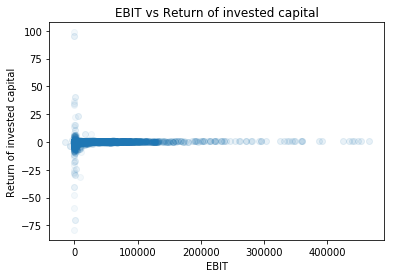

In [19]:
plt.plot(data['ebit'], data['npic'], 'o', alpha = 0.05)
plt.xlabel('EBIT')
plt.ylabel('Return of invested capital')
plt.title('EBIT vs Return of invested capital')
pass

Вывод тех наблюдений, где страна = США

In [20]:
data['loc'] == 'USA'

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21535    False
21536    False
21537    False
21538    False
21539     True
21540     True
21541     True
21542     True
21543     True
21544     True
21545     True
21546     True
21547    False
21548    False
21549    False
21550    False
21551    False
21552    False
21553    False
21554    False
21555    False
21556    False
21557    False
21558    False
21559     True
21560     True
21561    False
21562    False
21563    False
21564    False
Name: loc, Length: 21565, dtype: bool

Построение графика зависимости аудиторского заключения и показателя calc при условии, что страна США

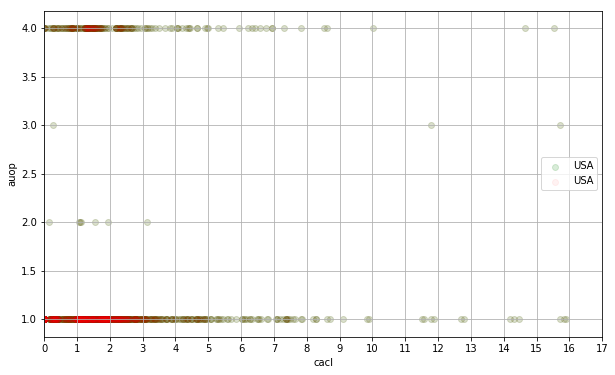

In [21]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['loc'] == 'USA']['cacl'],
            data[data['loc'] == 'USA']['auop'],
            alpha = 0.15,
            label = 'USA',
            color = 'g')

plt.scatter(data[data['loc'] == 'USA']['cacl'],
            data[data['loc'] == 'USA']['auop'],
            alpha = 0.05, #прозрачность
            label = 'USA',
            color = 'r')

plt.xlabel('cacl')
plt.xticks(range(18)) #засечки
plt.xlim(0, 17) 
plt.ylabel('auop')
plt.legend()
plt.grid()

Описательная статистика для переменных типа object

In [22]:
data.describe(include = ['object'])

,conml,loc,DataDate
count,21565,21565,21565
unique,1678,60,408
top,Novo Nordisk A/S,CAN,31.12.2003
freq,79,3075,674


In [23]:
data.describe(include = 'all')

,auop,conml,loc,DataDate,intas,gptas,nptas,catas,cacl,ctas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
count,21427.000000,21565,21565,21565,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,...,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000
unique,NaN,1678,60,408,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Novo Nordisk A/S,CAN,31.12.2003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,79,3075,674,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.634013,NaN,NaN,NaN,0.071835,0.227424,0.117119,0.327162,1.872637,0.089691,...,12678.293797,0.031432,0.084757,-0.725551,0.249149,0.894133,1.286055,1.349424,1.719008,1.040599
std,1.225867,NaN,NaN,NaN,0.090411,0.202277,0.523943,0.243448,5.287592,0.116556,...,29501.094451,0.207415,1.803849,57.839597,21.687419,15.278540,38.573951,44.318867,44.888240,5.821885
min,0.000000,NaN,NaN,NaN,0.000000,-3.820055,-29.180662,0.000000,0.000000,-0.016112,...,-15260.776000,-18.568807,-61.654838,-5637.437500,-1377.466165,-841.653543,-1652.157471,-38.088235,-292.302859,0.000000
25%,1.000000,NaN,NaN,NaN,0.002698,0.093780,0.024552,0.128005,0.749072,0.017261,...,648.246000,0.007533,0.037950,0.021269,0.000000,0.954107,0.908859,0.995198,1.000000,0.938182
50%,1.000000,NaN,NaN,NaN,0.037125,0.193756,0.142784,0.302972,1.281365,0.050370,...,2733.345000,0.037918,0.110805,0.072425,0.054540,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,NaN,NaN,NaN,0.116546,0.324393,0.301233,0.506176,2.003565,0.114484,...,11588.000000,0.077344,0.185718,0.148513,0.166841,1.004905,1.003823,1.112033,1.222609,1.014077


Перечень уникальных значений переменных auop и loc

In [24]:
data['auop'].unique()

array([  1.,   4.,   2.,   3.,   0.,  nan])

In [25]:
data['loc'].unique()

array(['USA', 'CAN', 'NLD', 'ISR', 'IRL', 'BMU', 'PHL', 'GBR', 'ESP',
       'FRA', 'JPN', 'SGP', 'CHN', 'BEL', 'CHE', 'SWE', 'FIN', 'NOR',
       'DNK', 'ZAF', 'PAN', 'CYM', 'MEX', 'HKG', 'ANT', 'LUX', 'AUS',
       'ITA', 'BOL', 'GRC', 'MCO', 'DEU', 'NZL', 'CHL', 'IND', 'PRT',
       'CUW', 'VEN', 'KOR', 'BRA', 'HUN', 'JEY', 'MYS', 'ARG', 'BHS',
       'IDN', 'MAC', 'PNG', 'TWN', 'PER', 'RUS', 'THA', 'POL', 'BLZ',
       'TUR', 'ISL', 'AUT', 'URY', 'COL', 'GHA'], dtype=object)

Перечень уникальных значений переменной loc и соответствующие им первые значения из переменной auop

In [26]:
for name in data['loc'].unique():
    print(name, data['auop'][data['loc'] == name].iloc[0])

USA 1.0
CAN 1.0
NLD 1.0
ISR 1.0
IRL 1.0
BMU 1.0
PHL 1.0
GBR 1.0
ESP 4.0
FRA 1.0
JPN 1.0
SGP 4.0
CHN 1.0
BEL 1.0
CHE 1.0
SWE 1.0
FIN 1.0
NOR 1.0
DNK 1.0
ZAF 1.0
PAN 1.0
CYM 1.0
MEX 2.0
HKG 1.0
ANT 1.0
LUX 1.0
AUS 1.0
ITA 1.0
BOL 4.0
GRC 1.0
MCO 1.0
DEU 1.0
NZL 4.0
CHL 4.0
IND 4.0
PRT 1.0
CUW 1.0
VEN 1.0
KOR 4.0
BRA 1.0
HUN 1.0
JEY 1.0
MYS 1.0
ARG 1.0
BHS 1.0
IDN 4.0
MAC 1.0
PNG 1.0
TWN 2.0
PER 1.0
RUS 4.0
THA 1.0
POL 3.0
BLZ 1.0
TUR 1.0
ISL 1.0
AUT 1.0
URY 1.0
COL 4.0
GHA 1.0


# 1. Предобработка данных

Определение типа переменных

In [3]:
y = data['auop']

In [4]:
data = data.drop(('auop'), axis = 1) 

In [5]:
data['catas'].dtype.name

'float64'

In [6]:
data['loc'].dtype.name

'object'

Перебор всех признаков при условии, что она категориальные, и при условии, что они не категориальные

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object'] 
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['conml', 'loc', 'DataDate']
['intas', 'gptas', 'nptas', 'catas', 'cacl', 'ctas', 'incl', 'ltdtas', 'npgp', 'tdtas', 'fastas', 'tatasly', 'gpns', 'npic', 'caicl', 'wctas', 'nstas', 'inic', 'slic', 'incas', 'ebit', 'nitas', 'ninas', 'nisl', 'nifas', 'trcgs', 'tafas', 'ttrev', 'defas', 'ldsdta']


In [8]:
for c in categorical_columns:
    print(c, data[c].unique())

conml ['United Dominion Industries' 'Abitibi-Consolidated Inc.'
 'ASM International NV' ... 'Allegion Plc' 'Dorian LPG Ltd'
 'Nomad Foods Ltd']
loc ['USA' 'CAN' 'NLD' 'ISR' 'IRL' 'BMU' 'PHL' 'GBR' 'ESP' 'FRA' 'JPN' 'SGP'
 'CHN' 'BEL' 'CHE' 'SWE' 'FIN' 'NOR' 'DNK' 'ZAF' 'PAN' 'CYM' 'MEX' 'HKG'
 'ANT' 'LUX' 'AUS' 'ITA' 'BOL' 'GRC' 'MCO' 'DEU' 'NZL' 'CHL' 'IND' 'PRT'
 'CUW' 'VEN' 'KOR' 'BRA' 'HUN' 'JEY' 'MYS' 'ARG' 'BHS' 'IDN' 'MAC' 'PNG'
 'TWN' 'PER' 'RUS' 'THA' 'POL' 'BLZ' 'TUR' 'ISL' 'AUT' 'URY' 'COL' 'GHA']
DataDate ['31.12.1985' '31.12.1986' '31.12.1987' '31.12.1988' '31.12.1989'
 '31.12.1991' '31.12.1992' '31.12.1993' '31.12.1994' '31.12.1995'
 '31.12.1996' '31.12.1997' '31.12.1998' '31.12.1999' '31.12.2000'
 '31.12.1990' '31.12.2001' '31.12.2002' '31.12.2003' '31.12.2004'
 '31.12.2005' '31.12.2006' '31.12.1982' '31.12.1983' '31.12.1984'
 '31.12.2007' '31.12.2008' '31.12.2009' '31.12.2010' '31.12.2011'
 '31.12.2012' '31.12.2013' '31.12.2014' '31.12.2015' '31.12.2016'
 '30.09.1982' '

**Обрабатываем пропущенные значения** при помощи импутации

In [9]:
data.median(axis = 0)

intas         0.037125
gptas         0.193756
nptas         0.142784
catas         0.302972
cacl          1.281365
ctas          0.050370
incl          0.165037
ltdtas        0.152489
npgp          0.794843
tdtas         0.398550
fastas        0.517985
tatasly       1.000000
gpns          0.382642
npic          0.268760
caicl         0.976254
wctas         0.063915
nstas         0.554561
inic          0.053371
slic          0.875301
incas         0.120547
ebit       2733.345000
nitas         0.037918
ninas         0.110805
nisl          0.072425
nifas         0.054540
trcgs         1.000000
tafas         1.000000
ttrev         1.000000
defas         1.000000
ldsdta        1.000000
dtype: float64

In [10]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [11]:
data[numerical_columns].count(axis = 0)

intas      21565
gptas      21565
nptas      21565
catas      21565
cacl       21565
ctas       21565
incl       21565
ltdtas     21565
npgp       21565
tdtas      21565
fastas     21565
tatasly    21565
gpns       21565
npic       21565
caicl      21565
wctas      21565
nstas      21565
inic       21565
slic       21565
incas      21565
ebit       21565
nitas      21565
ninas      21565
nisl       21565
nifas      21565
trcgs      21565
tafas      21565
ttrev      21565
defas      21565
ldsdta     21565
dtype: int64

In [12]:
data['loc'].describe()

count     21565
unique       60
top         CAN
freq       3075
Name: loc, dtype: object

In [13]:
data['loc'].describe().top 

'CAN'

In [14]:
data.describe(include = [object])

,conml,loc,DataDate
count,21565,21565,21565
unique,1678,60,408
top,Novo Nordisk A/S,CAN,31.12.2003
freq,79,3075,674


Замена пропусков при помощи средних значений ('top')

In [15]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [16]:
data.describe(include = [object])

,conml,loc,DataDate
count,21565,21565,21565
unique,1678,60,408
top,Novo Nordisk A/S,CAN,31.12.2003
freq,79,3075,674


**Dummy-кодирование** (one-hot-encoding) для переменной loc

In [17]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['conml', 'loc', 'DataDate']


Нет бинарных признаков, значит к небинарным категориальным принакам применяем Dummy-кодирование. Оно требуется только для для признака loc, т.к. другие признаки не несут смысловой назгрузки, они должны быть удалены.

In [18]:
data['loc'].unique()

array(['USA', 'CAN', 'NLD', 'ISR', 'IRL', 'BMU', 'PHL', 'GBR', 'ESP',
       'FRA', 'JPN', 'SGP', 'CHN', 'BEL', 'CHE', 'SWE', 'FIN', 'NOR',
       'DNK', 'ZAF', 'PAN', 'CYM', 'MEX', 'HKG', 'ANT', 'LUX', 'AUS',
       'ITA', 'BOL', 'GRC', 'MCO', 'DEU', 'NZL', 'CHL', 'IND', 'PRT',
       'CUW', 'VEN', 'KOR', 'BRA', 'HUN', 'JEY', 'MYS', 'ARG', 'BHS',
       'IDN', 'MAC', 'PNG', 'TWN', 'PER', 'RUS', 'THA', 'POL', 'BLZ',
       'TUR', 'ISL', 'AUT', 'URY', 'COL', 'GHA'], dtype=object)

In [19]:
data_nonbinary = pd.get_dummies(data['loc'])
print(data_nonbinary.columns)

Index(['ANT', 'ARG', 'AUS', 'AUT', 'BEL', 'BHS', 'BLZ', 'BMU', 'BOL', 'BRA',
       'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CUW', 'CYM', 'DEU', 'DNK', 'ESP',
       'FIN', 'FRA', 'GBR', 'GHA', 'GRC', 'HKG', 'HUN', 'IDN', 'IND', 'IRL',
       'ISL', 'ISR', 'ITA', 'JEY', 'JPN', 'KOR', 'LUX', 'MAC', 'MCO', 'MEX',
       'MYS', 'NLD', 'NOR', 'NZL', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT',
       'RUS', 'SGP', 'SWE', 'THA', 'TUR', 'TWN', 'URY', 'USA', 'VEN', 'ZAF'],
      dtype='object')


**Нормализация количественных признаков**

In [20]:
nonbinary_columns = ['loc']

Вывод количественных признаков и их описательной статистики

In [21]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,tdtas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
count,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,...,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000
mean,0.071835,0.227424,0.117119,0.327162,1.872637,0.089691,0.535517,0.181748,0.361364,0.389024,...,12678.293797,0.031432,0.084757,-0.725551,0.249149,0.894133,1.286055,1.349424,1.719008,1.040599
std,0.090411,0.202277,0.523943,0.243448,5.287592,0.116556,9.069063,0.166983,137.608727,0.236879,...,29501.094451,0.207415,1.803849,57.839597,21.687419,15.278540,38.573951,44.318867,44.888240,5.821885
min,0.000000,-3.820055,-29.180662,0.000000,0.000000,-0.016112,0.000000,0.000000,-18239.000000,0.000000,...,-15260.776000,-18.568807,-61.654838,-5637.437500,-1377.466165,-841.653543,-1652.157471,-38.088235,-292.302859,0.000000
25%,0.002698,0.093780,0.024552,0.128005,0.749072,0.017261,0.000000,0.053237,0.234461,0.210116,...,648.246000,0.007533,0.037950,0.021269,0.000000,0.954107,0.908859,0.995198,1.000000,0.938182
50%,0.037125,0.193756,0.142784,0.302972,1.281365,0.050370,0.165037,0.152489,0.794843,0.398550,...,2733.345000,0.037918,0.110805,0.072425,0.054540,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.116546,0.324393,0.301233,0.506176,2.003565,0.114484,0.439484,0.269208,1.529336,0.539781,...,11588.000000,0.077344,0.185718,0.148513,0.166841,1.004905,1.003823,1.112033,1.222609,1.014077
max,0.993952,2.101139,1.444099,1.000000,310.821782,0.996235,584.931818,6.103740,6243.659306,6.774876,...,465406.282000,1.168020,141.741936,1861.000000,1020.129114,1770.380234,3935.760423,6501.800000,6242.334674,745.203662


Нормализация (стандартизация)

In [22]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [23]:
data_numerical.describe()

,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,tdtas,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
count,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,...,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04
mean,8.491302e-15,5.066231e-15,3.007641e-15,7.353635e-15,1.214419e-15,-4.206270e-15,-1.276867e-15,7.565476e-16,2.705382e-17,-8.807907e-16,...,-2.650841e-17,9.651527e-16,-2.549034e-16,-9.256739e-18,-6.918035e-17,3.494235e-16,-3.857213e-16,-1.000987e-15,-6.761747e-16,9.719556e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.945428e-01,-2.000955e+01,-5.591790e+01,-1.343869e+00,-3.541569e-01,-9.077422e-01,-5.904875e-02,-1.088418e+00,-1.325451e+02,-1.642293e+00,...,-9.470520e-01,-8.967659e+01,-3.422658e+01,-9.745421e+01,-6.352601e+01,-5.514582e+01,-4.286425e+01,-8.898616e-01,-6.550087e+00,-1.787393e-01
25%,-7.646999e-01,-6.606955e-01,-1.766753e-01,-8.180708e-01,-2.124909e-01,-6.214189e-01,-5.904875e-02,-7.696016e-01,-9.222007e-04,-7.552720e-01,...,-4.077831e-01,-1.152235e-01,-2.594822e-02,1.291191e-02,-1.148819e-02,3.925403e-03,-9.778496e-03,-7.992681e-03,-1.601774e-02,-1.759186e-02
50%,-3.839207e-01,-1.664437e-01,4.898422e-02,-9.936638e-02,-1.118226e-01,-3.373548e-01,-4.085099e-02,-1.752169e-01,3.150086e-03,4.021458e-02,...,-3.371044e-01,3.127296e-02,1.444046e-02,1.379636e-02,-8.973375e-03,6.929138e-03,-7.415744e-03,-7.884323e-03,-1.601774e-02,-6.973598e-03
75%,4.945238e-01,4.793881e-01,3.513993e-01,7.353289e-01,2.476123e-02,2.127136e-01,-1.058903e-02,5.237680e-01,8.487634e-03,6.364300e-01,...,-3.695774e-02,2.213559e-01,5.597003e-02,1.511185e-02,-3.795182e-03,7.250154e-03,-7.316649e-03,-5.356434e-03,-1.105855e-02,-4.555600e-03
max,1.019916e+01,9.263098e+00,2.532679e+00,2.763785e+00,5.842908e+01,7.777766e+00,6.443844e+01,3.546456e+01,4.536993e+01,2.695831e+01,...,1.534614e+01,5.479788e+00,7.853050e+01,3.218773e+01,4.702634e+01,1.158151e+02,1.019982e+02,1.466746e+02,1.390256e+02,1.278217e+02


**Соединяем все в одну таблицу**

In [24]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(21565, 90)


In [25]:
data.describe()

,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,tdtas,...,RUS,SGP,SWE,THA,TUR,TWN,URY,USA,VEN,ZAF
count,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,2.156500e+04,...,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000
mean,8.491302e-15,5.066231e-15,3.007641e-15,7.353635e-15,1.214419e-15,-4.206270e-15,-1.276867e-15,7.565476e-16,2.705382e-17,-8.807907e-16,...,0.008069,0.006446,0.014885,0.000046,0.001484,0.010897,0.000278,0.043775,0.001391,0.018038
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.089465,0.080027,0.121096,0.006810,0.038494,0.103822,0.016678,0.204598,0.037273,0.133094
min,-7.945428e-01,-2.000955e+01,-5.591790e+01,-1.343869e+00,-3.541569e-01,-9.077422e-01,-5.904875e-02,-1.088418e+00,-1.325451e+02,-1.642293e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.646999e-01,-6.606955e-01,-1.766753e-01,-8.180708e-01,-2.124909e-01,-6.214189e-01,-5.904875e-02,-7.696016e-01,-9.222007e-04,-7.552720e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.839207e-01,-1.664437e-01,4.898422e-02,-9.936638e-02,-1.118226e-01,-3.373548e-01,-4.085099e-02,-1.752169e-01,3.150086e-03,4.021458e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.945238e-01,4.793881e-01,3.513993e-01,7.353289e-01,2.476123e-02,2.127136e-01,-1.058903e-02,5.237680e-01,8.487634e-03,6.364300e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.019916e+01,9.263098e+00,2.532679e+00,2.763785e+00,5.842908e+01,7.777766e+00,6.443844e+01,3.546456e+01,4.536993e+01,2.695831e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data = pd.concat([data, y], axis = 1)

Балансировка классов (у нас 5 классов, выделяем по 1000 наблюдений из каждого и перемешиваем)

In [27]:
def balanced_sample(df, size_class, dict_count):
    for i in dict_count.keys():
        df_i = df.loc[(df['auop'] == i)]
        df_i_new = df_i.sample(size_class, replace = True)
        if i == 1:
            df_balanced = df_i_new
        else:
            df_balanced = pd.concat([df_balanced, df_i_new], axis = 0)
    return df_balanced

In [28]:
def dict_classes(serie):  
    l_unique = serie.unique()   
    l = l_unique.tolist()             
    d = {key:value for key, value in zip(l, range(len(l)))} 
    new_series = pd.Series()
    a = 0
    for j in serie:
        for i in d.keys():
            if i == j:
                new_series.set_value(a, d[i])
                a += 1
    new_series.index = range(len(new_series))    
    l_serie = new_series.tolist()
    dict_count = {key: l_serie.count(key) for key in range(len(new_series.unique()))}
    return d, new_series, dict_count

Убираем наблюдения, где класс = 0, так как данный класс нет необходимости предсказывать (нет информации по поводу того, выявлен ли факт фальсификации финансовой отчетности)

In [29]:
data = data.loc[(data["auop"] != 0)]
data.shape

(21412, 91)

In [30]:
y = data['auop']
X = data.drop(('auop'), axis = 1) 
df = pd.concat([y, X], axis = 1)

In [31]:
df

,auop,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,...,RUS,SGP,SWE,THA,TUR,TWN,URY,USA,VEN,ZAF
0,1.0,1.512672,0.017984,-0.044539,0.776485,-0.000474,-0.769507,0.024282,0.617554,0.000324,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.383087,-0.330351,-0.151245,0.935210,-0.015086,-0.769507,-0.021113,0.395821,-0.000912,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.890857,0.029864,-0.582904,1.139486,-0.067591,-0.769507,-0.016937,0.433474,-0.008487,...,0,0,0,0,0,0,0,1,0,0
3,4.0,1.307130,-0.004160,-0.510150,1.667471,0.083036,-0.769507,0.007019,0.178665,-0.007442,...,0,0,0,0,0,0,0,1,0,0
4,4.0,1.945996,0.074514,-0.508104,1.306656,0.060793,0.435137,0.033850,-0.068943,-0.007094,...,0,0,0,0,0,0,0,1,0,0
5,1.0,1.362509,0.156538,-0.322380,1.074323,-0.004047,0.144001,0.008573,0.113884,-0.004079,...,0,0,0,0,0,0,0,1,0,0
6,1.0,1.344154,0.289014,-0.308116,0.899043,-0.031944,-0.156893,0.007477,0.202874,-0.003752,...,0,0,0,0,0,0,0,1,0,0
7,1.0,1.143401,0.194459,-0.268852,0.526150,-0.017477,-0.355406,0.016499,0.889248,-0.003273,...,0,0,0,0,0,0,0,1,0,0
8,1.0,1.269928,0.651409,-0.194127,0.651904,-0.039255,-0.126750,0.011483,0.276260,-0.002314,...,0,0,0,0,0,0,0,1,0,0
9,1.0,1.420404,0.581051,-0.067801,0.476013,-0.038652,-0.150465,0.024096,0.481094,-0.000907,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df_balanced = balanced_sample(df = df, size_class = 3000, dict_count = {i:i for i in range(1, 4)})
df_balanced_mix = df_balanced.sample(frac = 1)
df_balanced_mix.index = range(len(df_balanced_mix))

In [33]:
y_mix = df_balanced_mix["auop"]
del df_balanced_mix["auop"]
X_mix = df_balanced_mix

In [34]:
X_mix.shape

(9000, 90)

# 2. Выделение X и y

In [35]:
X = X_mix
y = y_mix

Разбиваем X и y на тестовую и тренировочную выборки (30% и 70% соответственно)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6300 2700


## 3. Применение методов машинного обучения

# - kNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [94]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Предсказание на тренировочной и тестовой выборки, вывод ошибки

In [96]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.192580324611 0.219319938176


Делаем вывод по ошибке на тестовой выборке: она получилась достаточно высокой

Составление матрицы точности классификации (5 классов)

In [101]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[4795    3    0    0  199]
 [  23    4    0    0   12]
 [  19    0    0    0    5]
 [  54    0    0    0    6]
 [1084   11    0    1  213]]


In [102]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

**Оптимизация гиперпараметров** (поиск по заданной сетке) - вывод ошибки и значения гиперпараметра количество соседей

In [115]:
from sklearn.model_selection import GridSearchCV
nnb = [5, 10, 20, 30]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.223363115082 20


20 ближайших соседей - именно столько необходимо, чтобы ошибка на тестовой выборке была минимальной

Обучение модели с найденным гиперпараметром, находим средние ошибки предсказания на тестовой и тренировочной выборке

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

Аналогичные действия с оптимизацией гиперпараметров можно провести со всеми алгоритмами обучения, но это не будет произведено в силу достаточно длительного времени поиска по сетке гиперпараметров.

# SVC

In [106]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.22709694626 0.222585160989


# Random Forest

In [107]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.00233364448593 0.202208741639


### Значимость признаков

In [108]:
np.sum(rf.feature_importances_)

1.0

Определение значимости всех признаков относительно переменной auop

In [109]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature ' ebit' (0.038733)
 2. feature ' ctas' (0.036157)
 3. feature ' npic' (0.035760)
 4. feature ' gpns' (0.035596)
 5. feature 'gptas' (0.035266)
 6. feature 'nstas' (0.035186)
 7. feature 'nptas' (0.035158)
 8. feature 'tdtas' (0.034973)
 9. feature 'ninas' (0.034923)
10. feature ' npgp' (0.034724)
11. feature ' slic' (0.034379)
12. feature 'ltdtas' (0.034186)
13. feature 'nitas' (0.033716)
14. feature 'fastas' (0.033557)
15. feature ' nisl' (0.033252)
16. feature 'nifas' (0.030715)
17. feature 'wctas' (0.028972)
18. feature 'catas' (0.028454)
19. feature ' inic' (0.027710)
20. feature 'intas' (0.027554)
21. feature 'caicl' (0.027069)
22. feature ' cacl' (0.026823)
23. feature 'incas' (0.026648)
24. feature ' incl' (0.025825)
25. feature 'defas' (0.024947)
26. feature 'trcgs' (0.023632)
27. feature 'ldsdta' (0.023131)
28. feature 'ttrev' (0.022570)
29. feature 'tatasly' (0.022462)
30. feature 'tafas' (0.020908)
31. feature '  KOR' (0.008872)
32. feature '  ME

(-1, 20)

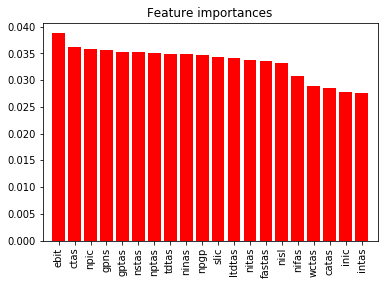

In [111]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [112]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.00233364448593 0.219785347643


# AdaBoost

In [113]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.56587545006 0.573650645513


# GBT

In [114]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0797439658621 0.210763726863


По итогу после применения нескольких алгоритмов обучения наиболее точным для данной задачи (без оптимизации гиперпараметров)на тестовой выборке показал себя случайный лес, где ошибка составила ~20%. Это достаточно высокий результат, который может быть улучшен после оптимизации гиперпараметров. Для ускорения оптимизации возможно осуществлять не только стандартный поиск по заданной сетке параметров, но и использовать библиотеку Hyperopt, реализующую эвристический алгоритм поиска.

# Neural network

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [57]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [58]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.208015899304 0.23029366306


In [59]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.791984100696 0.76970633694


In [60]:
print(1 - mlp_model.score(X_test, y_test))

0.23029366306


Для начала оптимизируем гиперпараметры по-отдельности.

Оптимизация Альфа:

In [61]:
alpha_arr = np.logspace(-3, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

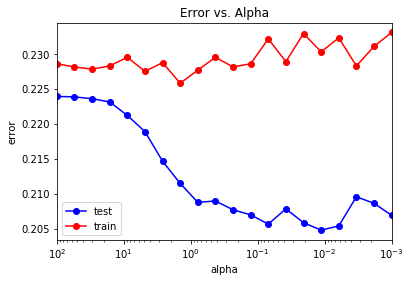

In [62]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. Alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [63]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.204769791322 0.225811437403


Оптимальное найденное значение параметра альфа

In [64]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

1.43844988829


Оптимизация количества нейронов:

In [66]:
neurons_arr = np.arange(10,500,10)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

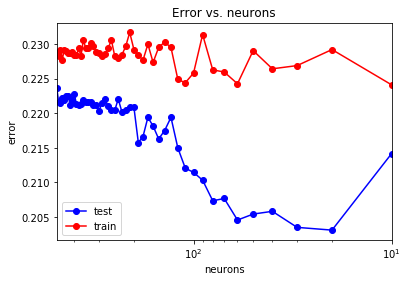

In [68]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

In [69]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.203113613779 0.224111282844


In [71]:
neurons_opt = neurons_arr[test_err == min_test_err]
neurons_opt = neurons_opt[0]
print(neurons_opt)

10


Из полученных графиков можно сделать следующий вывод: в соотвествии с первым графиком ошибка на тренировочной выборке значительно увеличивается по сравнению с ошибкой на тестовой выборке с уменьением значения параметра альфа. Это говорит о небольшом переобучении модели. На втором графике наблюдается схожая ситуация, то есть начиная с ~30 нейронов модель переобучается.

Также попробуем оптимизировать гиперпараметры на всем пространстве одновременно для однослойной сети (немного уменьшим сетку гиперпараметров для ускорения вычислений).

In [88]:
alpha_arr = np.logspace(-2, 2, 10)
neurons_arr = np.arange(10,200,10)
alpha_opt = 0
neurons_opt = 0
current_test_error = 100
for neuron in neurons_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron, ), 
                                  solver = 'lbfgs', activation = 'logistic', random_state = 42)
        mlp_model.fit(X_train, y_train)

        y_test_pred = mlp_model.predict(X_test)
        test_error = np.mean(y_test != y_test_pred)
        if (test_error < current_test_error):
            alpha_opt = alpha
            neurons_opt = neuron
            current_test_error = test_error 
print(alpha_opt)
print(neurons_opt)

1.6681005372
60


Найденные гиперпараметры отличаются от тех, что были найдены при оптимизации по-отдельности. Обучим модель с первоначальными найденными оптимальными значениями гиперпараметров.

In [84]:
mlp_model = MLPClassifier(hidden_layer_sizes = (neurons_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [85]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.214044385558 0.221792890263


Построим матрицу рассогласования

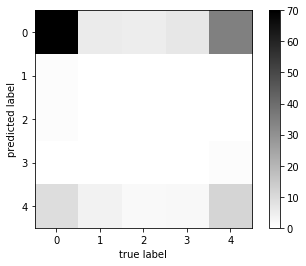

In [86]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(5))
plt.yticks(range(5))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Теперь обучим модель с найденными значениями гиперапаметров при одновременной оптимизации на вложенном цикле.

In [89]:
mlp_model = MLPClassifier(hidden_layer_sizes = (neurons_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [90]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.202848625373 0.221329211747


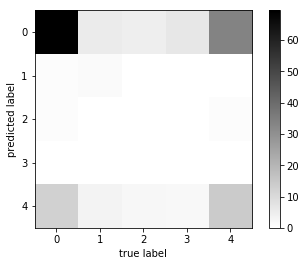

In [91]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(5))
plt.yticks(range(5))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Далее построим двуслойную нейронную сеть с использованием найденных оптимальных значений (оптимизация гиперпараметров по-отдельности), чтобы сравнить с предыдущими результатами. 

In [78]:
mlp_model = MLPClassifier(hidden_layer_sizes = (neurons_opt,neurons_opt), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_err = np.mean(y_train != y_train_pred)
test_err = np.mean(y_test != y_test_pred)
print(train_err)
print(test_err)

0.219079165287
0.224884080371


Результаты в двуслойсной сети незначительно отличаются от результатов однослойной сети. Двуслойная сеть демонстрирует чуть большие показатели ошибок на тренироввочной выборке.

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[4903   32   22   47 1241]
 [   1    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [  89   14    6    3  112]]


Построим матрицу рассогласования

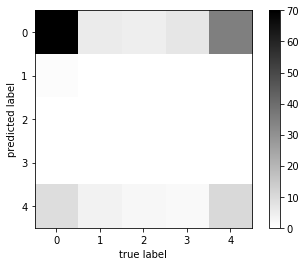

In [83]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(5))
plt.yticks(range(5))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

  b'-0.515'       0.79      0.98      0.87      4993
  b'-1.332'       0.00      0.00      0.00        46
  b'0.3025'       0.00      0.00      0.00        28
  b'1.1202'       0.00      0.00      0.00        50
  b'1.9379'       0.50      0.08      0.14      1353

avg / total       0.71      0.78      0.70      6470



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Выводы

Итоговые результаты сравнения нескольких использования нескольких алгоритмов машинного обучения дали следующие результаты: наилучшие результаты на тестовой выборке дает алгоритм Random Forest (~20%), по сравнению с этим нейронная сеть дает результат лишь в 22,4%. 

Если сравнивать результаты построения однослойной и двуслойной сети, они значения ошибки на тестовой части выборки получаются приблизительно одинаковыми. В однослойной сети при раздельной и при одновременной оптимизации гиперпараметров их значения получаются различными, но несмотря на это, ошибка на тестовой выборке не изменяется. 

В целом результаты по всем метрикам имеют такие результаты в связи с крайней несбалансированностью классов. Возможно, результаты могут быть улучшены путем добавления объектов недостающих классов.

# Лабораторная работа №3

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

## Random Forest

In [68]:
from sklearn import ensemble
grid = {'n_estimators':[50, 100, 200, 300, 400, 500, 700, 850, 1000, 1200, 1500],
        'max_depth':[3, 5, 10, 15],
        'max_features':[5, 10, 20, 30]}

Необходимо выполнить оптимизацию гиперпараметра n_estimators, а затем построить графики зависимости значения этого гиперпараметра на тестовой, тренировочной выборке и oob.

In [42]:
test_err = []
train_err = []
oob_err = []
for n_estimators in grid['n_estimators']:
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, oob_score = True)
    rf.fit(x_train_train, y_train_train)
    oob_error = 1 - rf.oob_score_
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(oob_error)

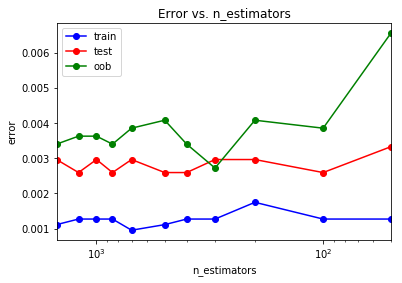

In [52]:
plt.semilogx(grid['n_estimators'], train_err, 'b-o', label = 'train')
plt.semilogx(grid['n_estimators'], test_err, 'r-o', label = 'test')
plt.semilogx(grid['n_estimators'], oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(grid['n_estimators']), np.min(grid['n_estimators'])])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Производим оптимизацию нескольких гиперпараметров.

In [41]:
grid_ = {'n_estimators':[50, 100, 300, 500, 700, 1000, 1500],
        'max_depth':[3, 5, 10, 15]}
n_estimators_opt = 0
max_depth_opt = 0
current_test_error = 100
for n_estimators in grid_['n_estimators']:
    for max_depth in grid_['max_depth']:
        rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
        rf.fit(x_train, y_train)
        y_test_pred = rf.predict(x_test)
        test_error = np.mean(y_test != y_test_pred)
        if (test_error < current_test_error):
            n_estimators_opt = n_estimators
            max_depth_opt = max_depth
            current_test_error = test_error 
        print('One iterration')
print(n_estimators_opt)
print(max_depth_opt)

One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
One iterration
300
15


Оптимальное число деревьев 300, оптимальная максимальная глубина дерева 15.

In [42]:
print(current_test_error)

0.0014814814814814814


При этом ошибка получается 0.0015

Произведем аналогичные вычисления с использованием других ансамблиевых алгоритмов классификации.

## Extremely Random Forests

In [45]:
test_err_etc = []
train_err_etc = []
oob_err_etc = []
for n_estimators in grid['n_estimators']:
    etc = ensemble.ExtraTreesClassifier(n_estimators = n_estimators, oob_score = True, bootstrap = True)
    etc.fit(x_train_train, y_train_train)
    oob_error = 1 - etc.oob_score_
    y_train_pred = etc.predict(x_train)
    y_test_pred = etc.predict(x_test)
    train_err_etc.append(np.mean(y_train != y_train_pred))
    test_err_etc.append(np.mean(y_test != y_test_pred))
    oob_err_etc.append(oob_error)

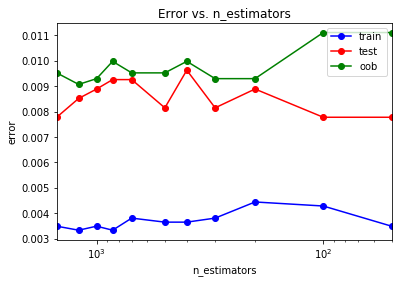

In [53]:
plt.semilogx(grid['n_estimators'], train_err_etc, 'b-o', label = 'train')
plt.semilogx(grid['n_estimators'], test_err_etc, 'r-o', label = 'test')
plt.semilogx(grid['n_estimators'], oob_err_etc, 'g-o', label = 'oob')
plt.xlim([np.max(grid['n_estimators']), np.min(grid['n_estimators'])])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [44]:
grid_ = {'n_estimators':[50, 100, 300, 500, 700, 1000, 1500],
        'max_depth':[3, 5, 10, 15]}
n_estimators_opt = 0
max_depth_opt = 0
current_test_error = 100
for n_estimators in grid_['n_estimators']:
    for max_depth in grid_['max_depth']:
        rf = ensemble.ExtraTreesClassifier(n_estimators = n_estimators, max_depth = max_depth)
        rf.fit(x_train, y_train)
        y_test_pred = rf.predict(x_test)
        test_error = np.mean(y_test != y_test_pred)
        if (test_error < current_test_error):
            n_estimators_opt = n_estimators
            max_depth_opt = max_depth
            current_test_error = test_error 
print(n_estimators_opt)
print(max_depth_opt)
print(current_test_error)

100
15
0.00962962962962963


## Adaboost

In [48]:
test_err_ab = []
train_err_ab = []
#oob_err_ab = []
for n_estimators in grid['n_estimators']:
    ab = ensemble.AdaBoostClassifier(n_estimators = n_estimators)
    ab.fit(x_train_train, y_train_train)
    #oob_error = 1 - ab.oob_score_
    y_train_pred = ab.predict(x_train)
    y_test_pred = ab.predict(x_test)
    train_err_ab.append(np.mean(y_train != y_train_pred))
    test_err_ab.append(np.mean(y_test != y_test_pred))
    #oob_err_ab.append(oob_error)

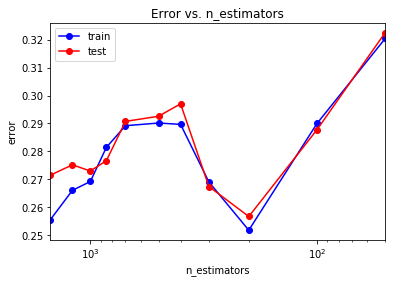

In [54]:
plt.semilogx(grid['n_estimators'], train_err_ab, 'b-o', label = 'train')
plt.semilogx(grid['n_estimators'], test_err_ab, 'r-o', label = 'test')
#plt.semilogx(grid['n_estimators'], test_err_ab, 'g-o', label = 'oob')
plt.xlim([np.max(grid['n_estimators']), np.min(grid['n_estimators'])])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [47]:
grid_ = {'n_estimators':[50, 100, 300, 500, 700, 1000, 1500]}
n_estimators_opt = 0
current_test_error = 100
for n_estimators in grid_['n_estimators']:
    rf = ensemble.AdaBoostClassifier(n_estimators = n_estimators)
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    test_error = np.mean(y_test != y_test_pred)
    if (test_error < current_test_error):
        n_estimators_opt = n_estimators
        current_test_error = test_error 
print(n_estimators_opt)
print(current_test_error)

1000
0.2796296296296296


## Gradient Boosted Trees

In [50]:
test_err_gbt = []
train_err_gbt = []
#oob_err_gbt = []
for n_estimators in grid['n_estimators']:
    gbt= ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    gbt.fit(x_train_train, y_train_train)
    #oob_error = 1 - gbt.oob_score_
    y_train_pred = gbt.predict(x_train)
    y_test_pred = gbt.predict(x_test)
    train_err_gbt.append(np.mean(y_train != y_train_pred))
    test_err_gbt.append(np.mean(y_test != y_test_pred))
    #oob_err_gbt.append(oob_error)

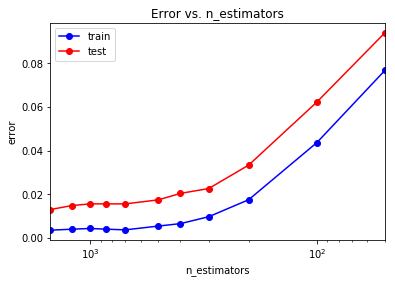

In [55]:
plt.semilogx(grid['n_estimators'], train_err_gbt, 'b-o', label = 'train')
plt.semilogx(grid['n_estimators'], test_err_gbt, 'r-o', label = 'test')
#plt.semilogx(grid['n_estimators'], test_err_gbt, 'g-o', label = 'oob')
plt.xlim([np.max(grid['n_estimators']), np.min(grid['n_estimators'])])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [48]:
grid_ = {'n_estimators':[50, 100, 300, 500, 700, 1000, 1500],
        'max_depth':[3, 5, 10, 15]}
n_estimators_opt = 0
max_depth_opt = 0
current_test_error = 100
for n_estimators in grid_['n_estimators']:
    for max_depth in grid_['max_depth']:
        rf = ensemble.GradientBoostingClassifier(n_estimators = n_estimators, max_depth = max_depth)
        rf.fit(x_train, y_train)
        y_test_pred = rf.predict(x_test)
        test_error = np.mean(y_test != y_test_pred)
        if (test_error < current_test_error):
            n_estimators_opt = n_estimators
            max_depth_opt = max_depth
            current_test_error = test_error 
print(n_estimators_opt)
print(max_depth_opt)
print(current_test_error)

300
10
0.0033333333333333335


Далее попробуем произвести отбор признаков для алгоритма, продемонстрирующего наилучшие результаты RandomForestClassifier.

In [39]:
from feature_selector import FeatureSelector

In [58]:
X.columns

Index(['intas', 'gptas', 'nptas', 'catas', 'cacl', 'ctas', 'incl', 'ltdtas',
       'npgp', 'tdtas', 'fastas', 'tatasly', 'gpns', 'npic', 'caicl', 'wctas',
       'nstas', 'inic', 'slic', 'incas', 'ebit', 'nitas', 'ninas', 'nisl',
       'nifas', 'trcgs', 'tafas', 'ttrev', 'defas', 'ldsdta', 'ANT', 'ARG',
       'AUS', 'AUT', 'BEL', 'BHS', 'BLZ', 'BMU', 'BOL', 'BRA', 'CAN', 'CHE',
       'CHL', 'CHN', 'COL', 'CUW', 'CYM', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA',
       'GBR', 'GHA', 'GRC', 'HKG', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'JEY', 'JPN', 'KOR', 'LUX', 'MAC', 'MCO', 'MEX', 'MYS', 'NLD',
       'NOR', 'NZL', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT', 'RUS', 'SGP',
       'SWE', 'THA', 'TUR', 'TWN', 'URY', 'USA', 'VEN', 'ZAF'],
      dtype='object')

In [40]:
fs = FeatureSelector(data = X, labels = y)

print('Пропущенные значения')
fs.identify_missing(missing_threshold = 0.6)
#Незаполненные значения для каждого признака
df_missing = fs.missing_stats.head()
#Удаляемые признаки
fs.ops['missing']

Пропущенные значения
0 features with greater than 0.60 missing values.



[]

In [59]:
print('Признаки с нулевой важностью (для алгоритмов с деревьями)')
fs.identify_zero_importance(task = 'classification', 
                            n_iterations = 5, 
                            early_stopping = False) #включена ранняя остановка
zero_importance_features = fs.ops['zero_importance']

Признаки с нулевой важностью (для алгоритмов с деревьями)
Training Gradient Boosting Model


25 features with zero importance after one-hot encoding.



In [60]:
for i in X.columns:
    if i in zero_importance_features:
        del X[i]

In [61]:
X.shape

(9000, 65)

In [62]:
print('Признаки с единственным значением (без дисперсии)')
fs.identify_single_unique()
single_imp = fs.ops['single_unique']

Признаки с единственным значением (без дисперсии)
0 features with a single unique value.



In [63]:
for i in X.columns:
    if i in zero_importance_features:
        del X[i]

In [64]:
X.shape

(9000, 65)

In [47]:
print('Коллениарные признаки')
fs.identify_collinear(correlation_threshold = 0.95)

Коллениарные признаки
0 features with a correlation magnitude greater than 0.95.



Таким образом, было удалено 25 неважных признаков.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

In [70]:
grid_ = {'n_estimators':[50, 100, 300, 500, 700, 1000, 1500],
        'max_depth':[3, 5, 10, 15]}
n_estimators_opt = 0
max_depth_opt = 0
current_test_error = 100
for n_estimators in grid_['n_estimators']:
    for max_depth in grid_['max_depth']:
        rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
        rf.fit(x_train, y_train)
        y_test_pred = rf.predict(x_test)
        test_error = np.mean(y_test != y_test_pred)
        if (test_error < current_test_error):
            n_estimators_opt = n_estimators
            max_depth_opt = max_depth
            current_test_error = test_error 
print(n_estimators_opt)
print(max_depth_opt)
print(current_test_error)

50
15
0.0014814814814814814


## Выводы
Наилучшие результаты по ошибке на тестовой выборке продемонстрировал алгоритм RandomForestClassifier, судя по графикам, переобучения не наблюдается. Отбор признаков не дал значительных изменений в результатах.

# Лабораторная работа №4

## PCA

Попробуем использовать метод гравных компонент для понижения размерности признакового пространства. Алгоритм RandomForestClassifier ранее показал наилучшие результаты, поэтому применим к нему PCA.

In [49]:
from sklearn.decomposition import PCA

In [56]:
grid = {'n_components':[1, 2, 3, 5, 7, 10, 15, 20, 30]}
test_err_rf = []
train_err_rf = []
for n_comp in grid['n_components']:
    pca = PCA(n_components = n_comp, svd_solver = 'full')
    X_new = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
    x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)
    rf = ensemble.RandomForestClassifier(n_estimators = 100)
    rf.fit(x_train_train, y_train_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    train_err_rf.append(np.mean(y_train != y_train_pred))
    test_err_rf.append(np.mean(y_test != y_test_pred))

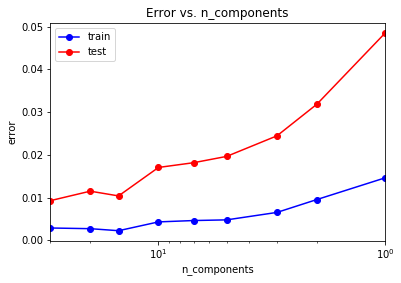

In [57]:
plt.semilogx(grid['n_components'], train_err_rf, 'b-o', label = 'train')
plt.semilogx(grid['n_components'], test_err_rf, 'r-o', label = 'test')
plt.xlim([np.max(grid['n_components']), np.min(grid['n_components'])])
plt.title('Error vs. n_components')
plt.xlabel('n_components')
plt.ylabel('error')
plt.legend()
pass

Определим наилучшее значение количества главных компонент

In [59]:
grid = {'n_components':[1, 2, 3, 5, 7, 10, 15, 20, 30]}
n_components_opt = 0
current_test_error = 100
for n_components in grid['n_components']:
    pca = PCA(n_components = n_components, svd_solver = 'full')
    X_new = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
    x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)
    rf = ensemble.RandomForestClassifier(n_estimators = 100)
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    test_error = np.mean(y_test != y_test_pred)
    if (test_error < current_test_error):
        n_components_opt = n_components
        current_test_error = test_error 
print(n_components_opt)
print(current_test_error)

15
0.006296296296296296


## Вывод
С использованием метода гдавных компонент точнсть классификации с использованием алгоритма RandomForestClassifier понизилась.